<a href="https://colab.research.google.com/github/slibolt/ADS500B/blob/main/EDA_DIscussion4_ADS508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data & Libraries


In [2]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import data
df = pd.read_csv("/content/drive/MyDrive/datasets/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Basic Data Information

In [5]:
#get shape
df.shape

(119390, 32)

In [6]:
#are there duplicates?
df.duplicated().sum()

np.int64(31994)

In [7]:
#get datatypes
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [9]:
# is there class imbalance?
df['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


<Axes: xlabel='is_canceled', ylabel='count'>

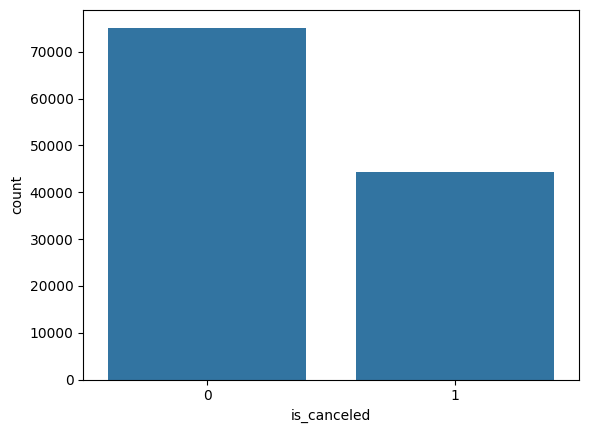

In [11]:
sns.countplot(x='is_canceled', data=df)

In [12]:
#percentage of binary class
print("percentage of each class", df['is_canceled'].value_counts()/len(df)*100)

percentage of each class is_canceled
0    62.958372
1    37.041628
Name: count, dtype: float64


# Data Quality Report

## Continuous Features

In [13]:
# identify continuous features
conf = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
conf

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [15]:
dqr_conf = pd.DataFrame({
    'Feature': conf,
    'Count': df[conf].count().values,
    'Missing Values': df[conf].isnull().sum().values,
    'Cardinality': df[conf].nunique().values,
    'Min': df[conf].min().values,
    '1st Quartile': df[conf].quantile(0.25).values,
    'Mean': df[conf].mean().values,
    'Median': df[conf].median().values,
    '3rd Quartile': df[conf].quantile(0.75).values,
    'Max': df[conf].max().values,
    'Standard Deviation': df[conf].std().values,
})
dqr_conf

,Feature,Count,Missing Values,Cardinality,Min,1st Quartile,Mean,Median,3rd Quartile,Max,Standard Deviation
0,is_canceled,119390,0,2,0.00,0.00,0.370416,0.000,1.0,1.0,0.482918
1,lead_time,119390,0,479,0.00,18.00,104.011416,69.000,160.0,737.0,106.863097
2,arrival_date_year,119390,0,3,2015.00,2016.00,2016.156554,2016.000,2017.0,2017.0,0.707476
3,arrival_date_week_number,119390,0,53,1.00,16.00,27.165173,28.000,38.0,53.0,13.605138
4,arrival_date_day_of_month,119390,0,31,1.00,8.00,15.798241,16.000,23.0,31.0,8.780829
5,stays_in_weekend_nights,119390,0,17,0.00,0.00,0.927599,1.000,2.0,19.0,0.998613
6,stays_in_week_nights,119390,0,35,0.00,1.00,2.500302,2.000,3.0,50.0,1.908286
7,adults,119390,0,14,0.00,2.00,1.856403,2.000,2.0,55.0,0.579261
8,children,119386,4,5,0.00,0.00,0.103890,0.000,0.0,10.0,0.398561
9,babies,119390,0,5,0.00,0.00,0.007949,0.000,0.0,10.0,0.097436


## Categorical Features

In [16]:
#identify any categorical features
catf = df.select_dtypes(include=['object']).columns.tolist()
catf

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [17]:
#create lists to store modes & frequencies
modes = []
mode_freqs = []
second_modes = []
second_mode_freqs = []
mode_percentages = []
second_mode_percentages = []

In [18]:
# Calculate mode and frequency for each categorical feature
for feature in catf:
    count = df[feature].count()
    mode = df[feature].mode().iloc[0]
    mode_freq = df[feature].value_counts().iloc[0]
    modes.append(mode)
    mode_freqs.append(mode_freq)
    mode_percentages.append((mode_freq / count) * 100 if count > 0 else 0)

    # Calculate second mode and its frequency
    if len(df[feature].value_counts()) > 1:
        second_mode = df[feature].value_counts().index[1]
        second_mode_freq = df[feature].value_counts().iloc[1]
    else:
        second_mode = None
        second_mode_freq = 0

    second_modes.append(second_mode)
    second_mode_freqs.append(second_mode_freq)
    second_mode_percentages.append((second_mode_freq / count) * 100 if count > 0 else 0)

In [20]:
#build quality report table
dqr_catf = pd.DataFrame({
    'Feature': catf,
    'Count': df[catf].count().values,
    'Missing Values': df[catf].isnull().sum().values,
    'Cardinality': df[catf].nunique().values,
    'Mode':modes,
    'Mode Frequency':mode_freqs,
    'Mode %': mode_percentages,
    '2nd Mode':second_modes,
    '2nd Mode Frequency': second_mode_freqs,
    '2nd Mode %': second_mode_percentages,
})
dqr_catf

,Feature,Count,Missing Values,Cardinality,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %
0,hotel,119390,0,2,City Hotel,79330,66.446101,Resort Hotel,40060,33.553899
1,arrival_date_month,119390,0,12,August,13877,11.623252,July,12661,10.604741
2,meal,119390,0,5,BB,92310,77.318033,HB,14463,12.114080
3,country,118902,488,177,PRT,48590,40.865587,GBR,12129,10.200838
4,market_segment,119390,0,8,Online TA,56477,47.304632,Offline TA/TO,24219,20.285619
5,distribution_channel,119390,0,5,TA/TO,97870,81.975040,Direct,14645,12.266521
6,reserved_room_type,119390,0,10,A,85994,72.027808,D,19201,16.082586
7,assigned_room_type,119390,0,12,A,74053,62.026133,D,25322,21.209482
8,deposit_type,119390,0,3,No Deposit,104641,87.646369,Non Refund,14587,12.217941
9,customer_type,119390,0,4,Transient,89613,75.059050,Transient-Party,25124,21.043638


# Univariate Analysis

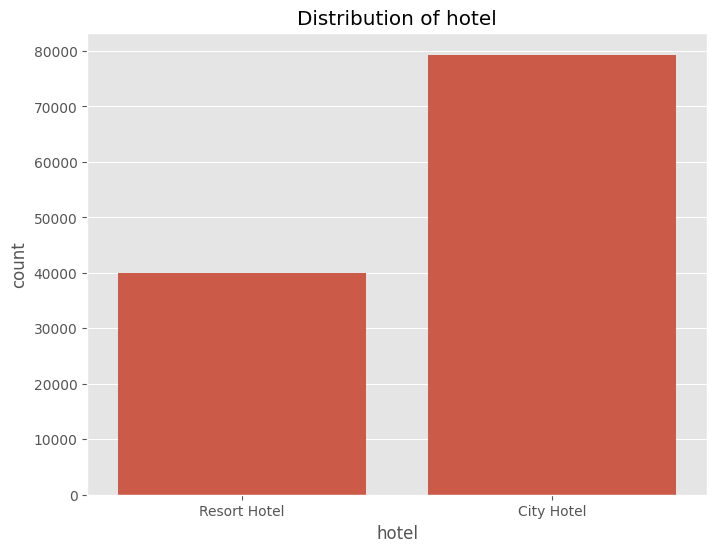

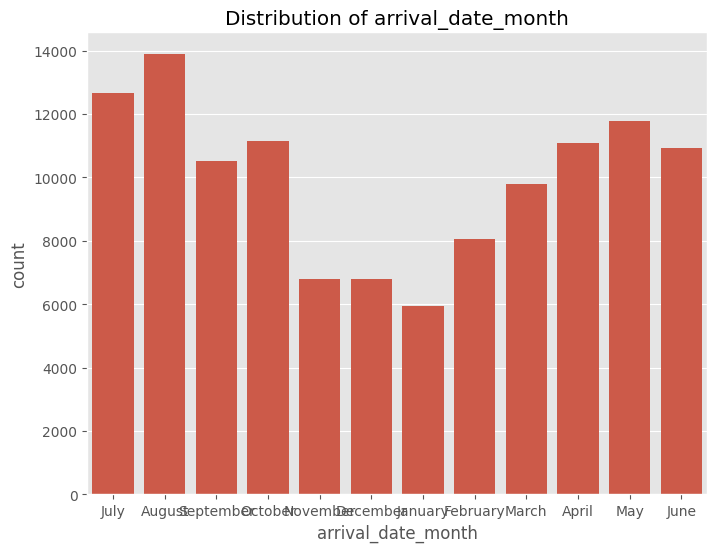

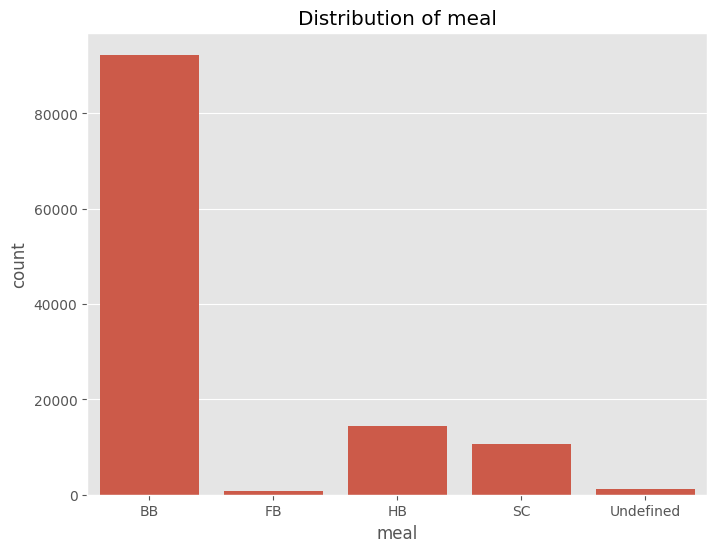

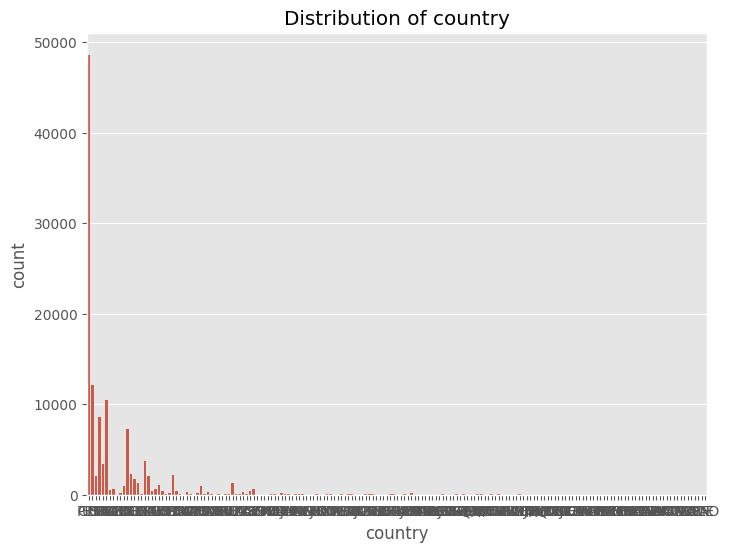

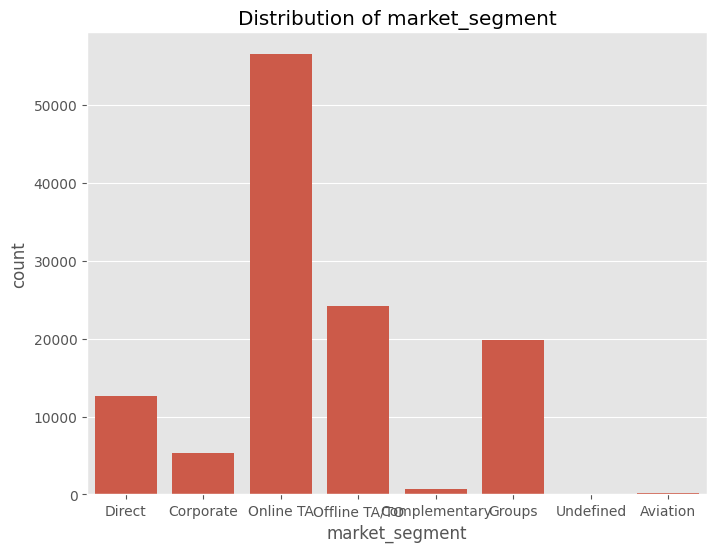

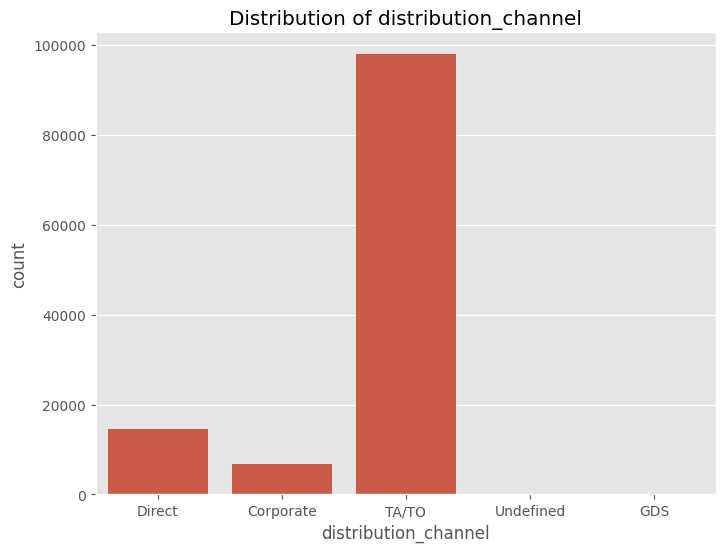

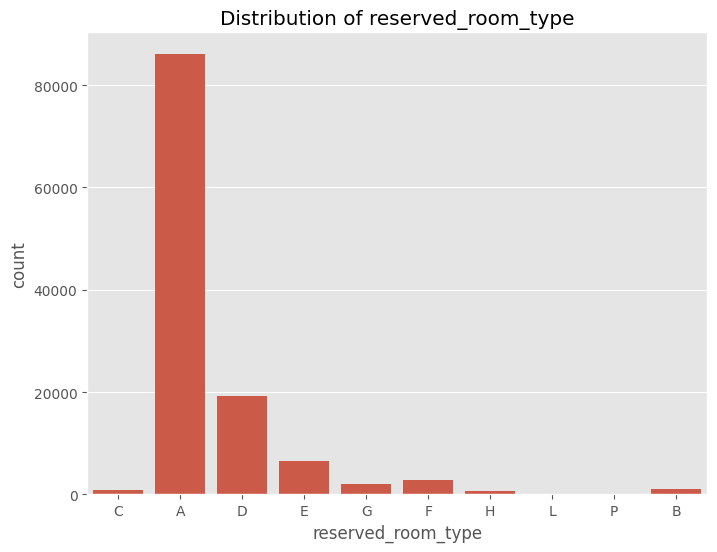

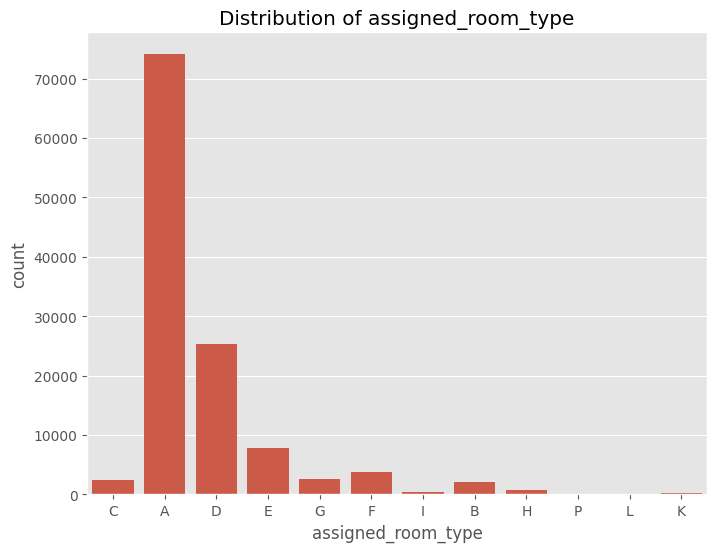

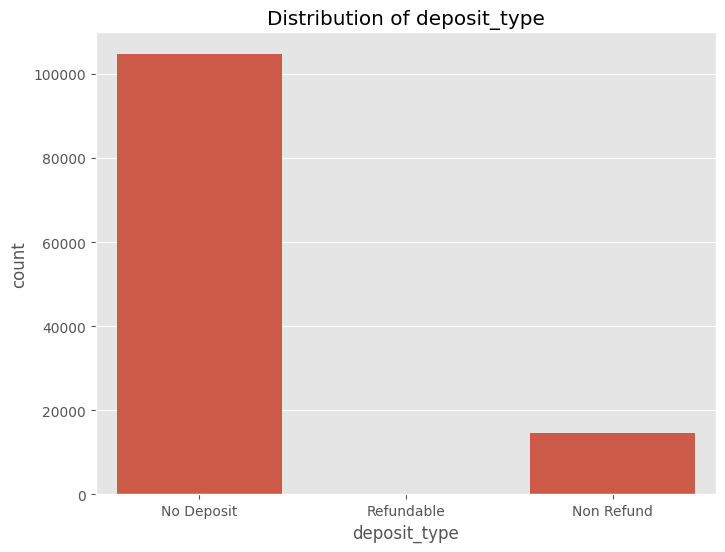

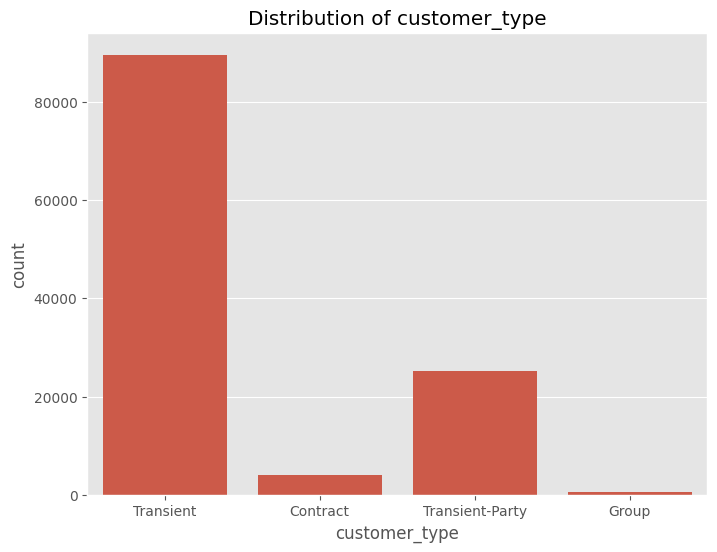

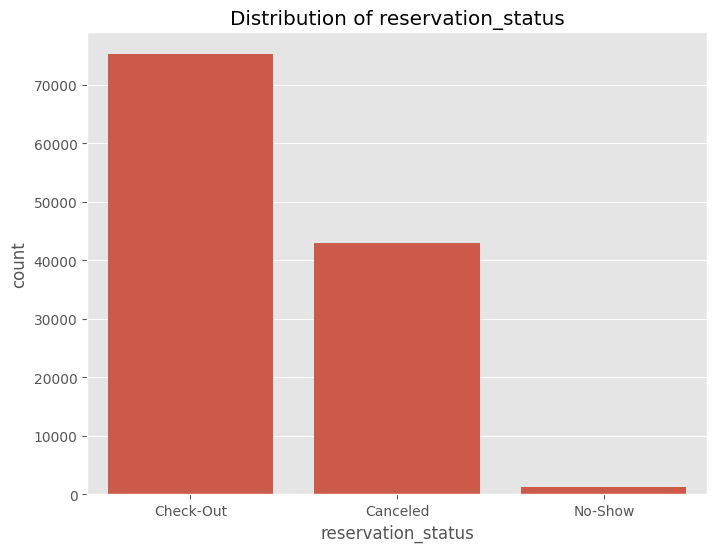

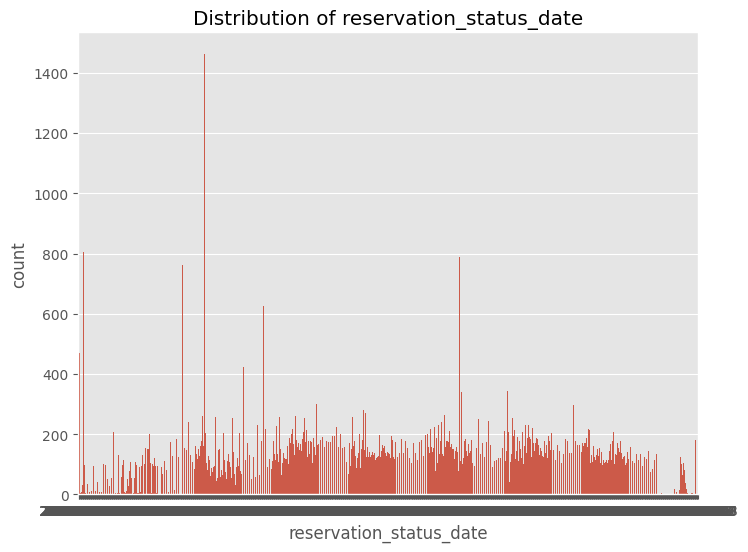

In [22]:
#plot the categorical variables
plt.style.use('ggplot')

for column in catf:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

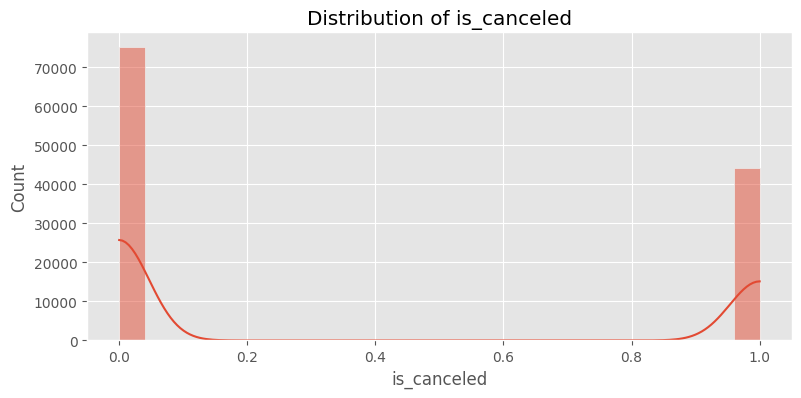

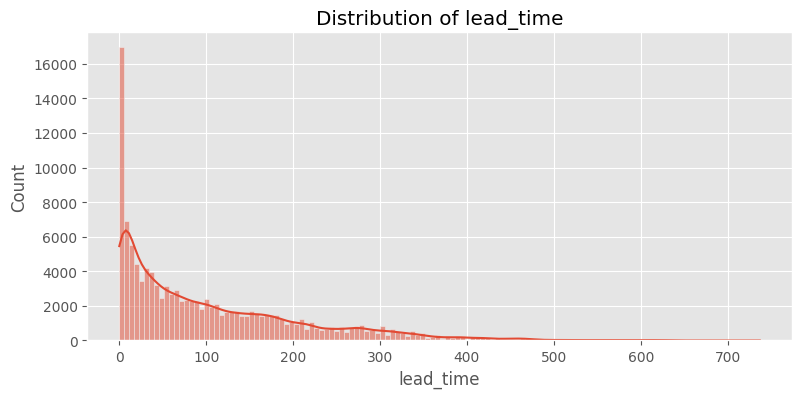

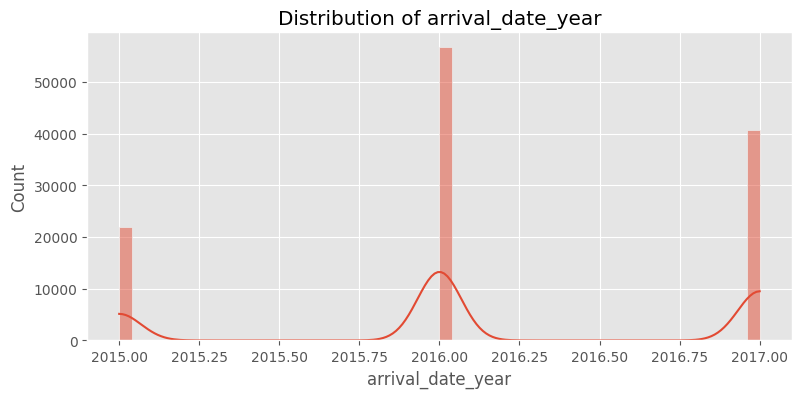

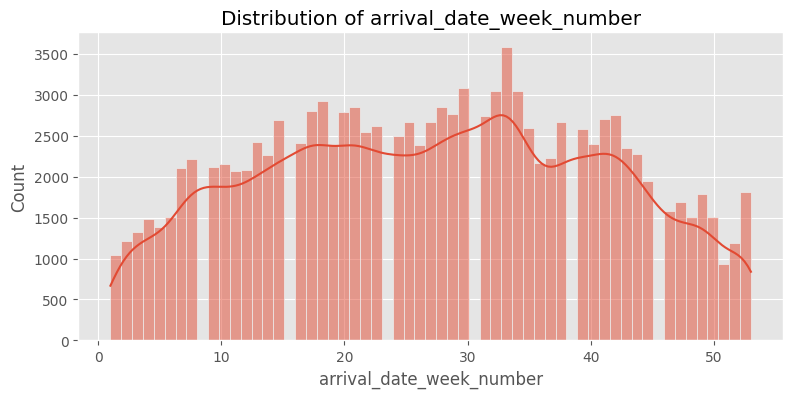

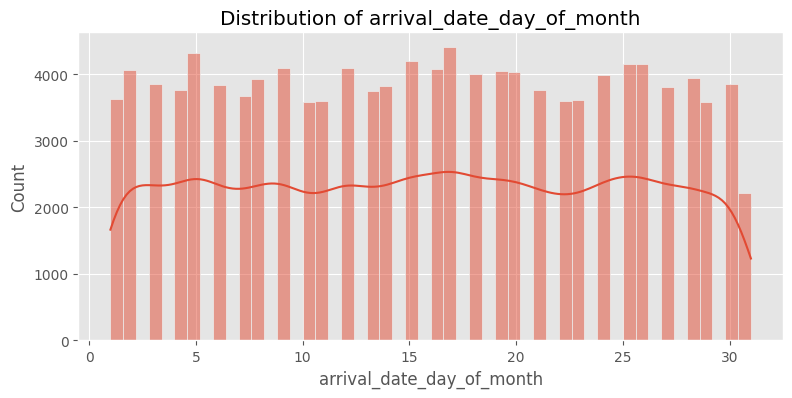

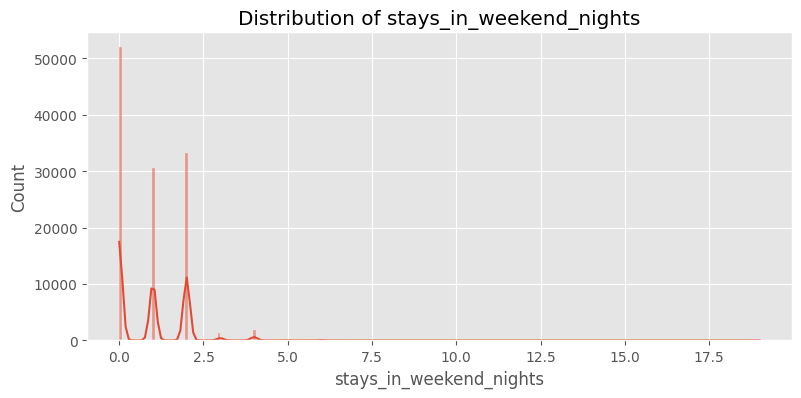

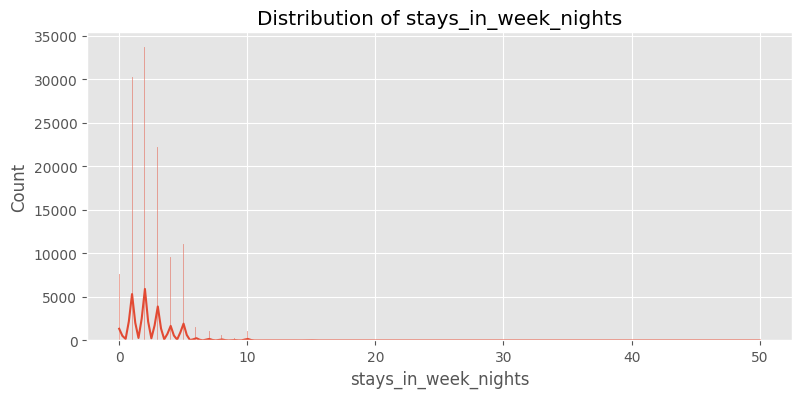

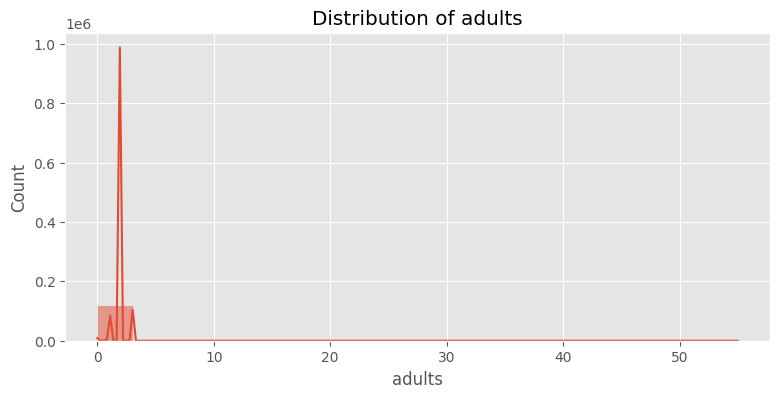

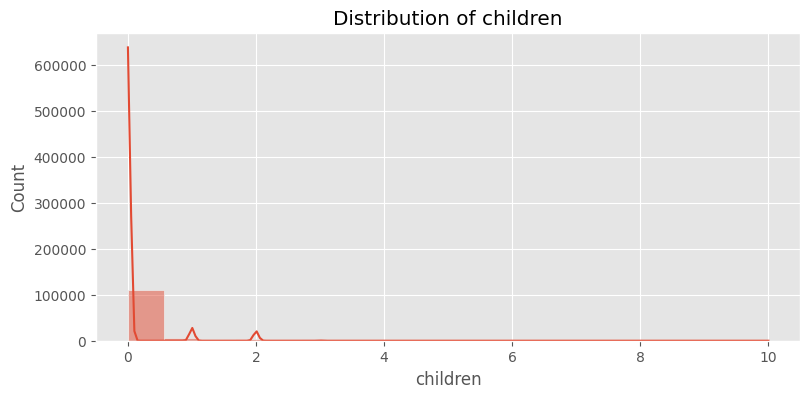

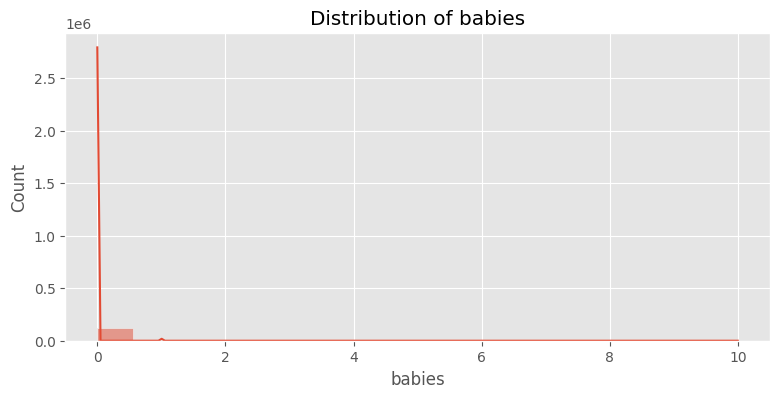

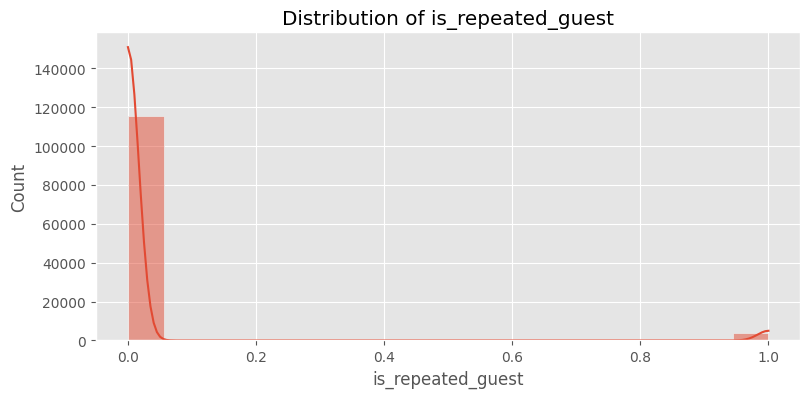

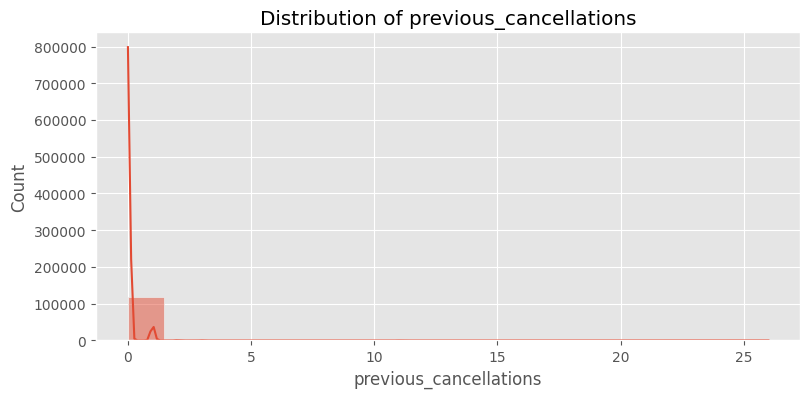

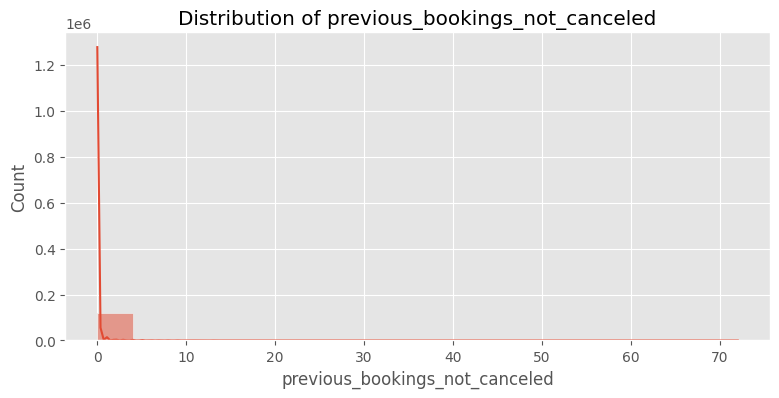

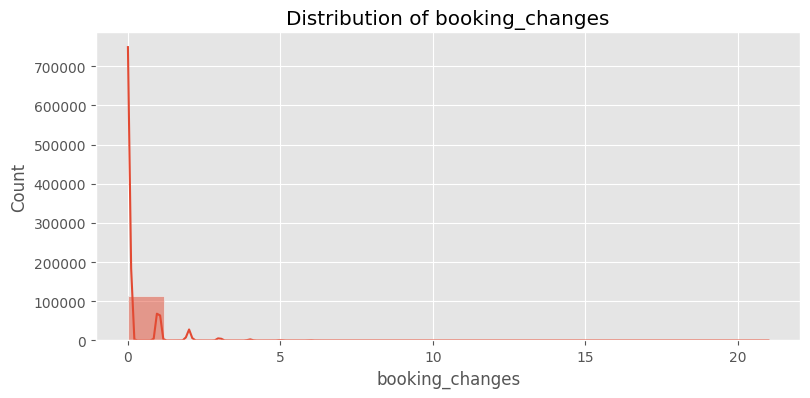

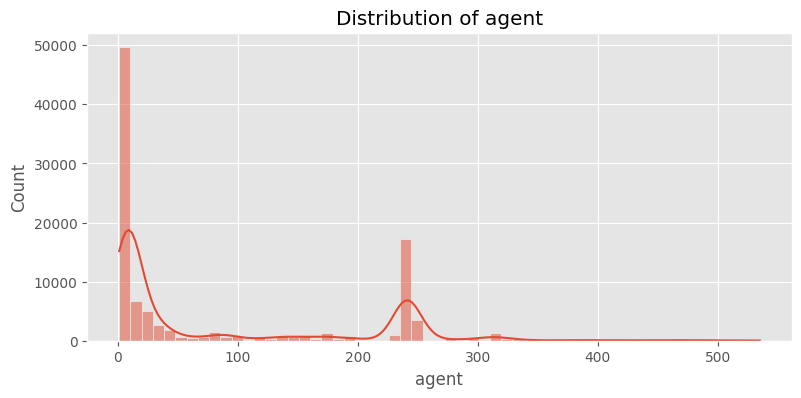

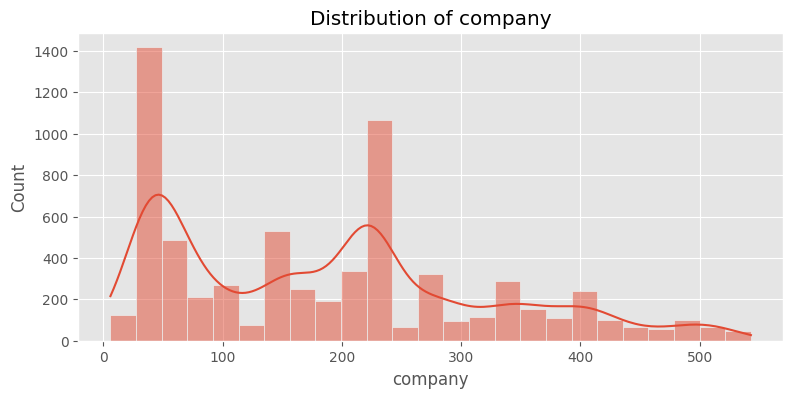

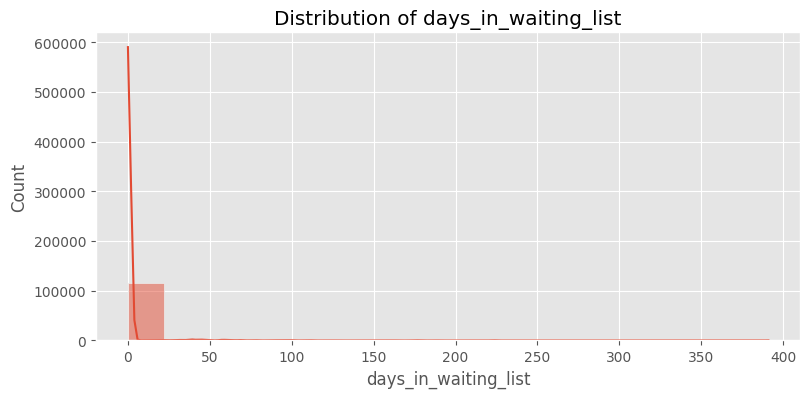

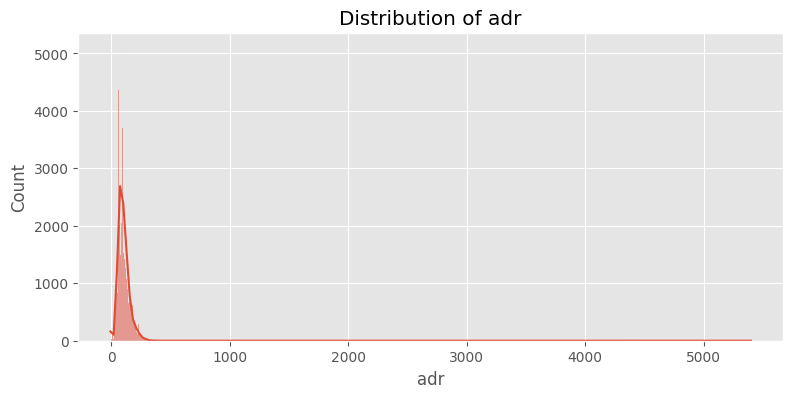

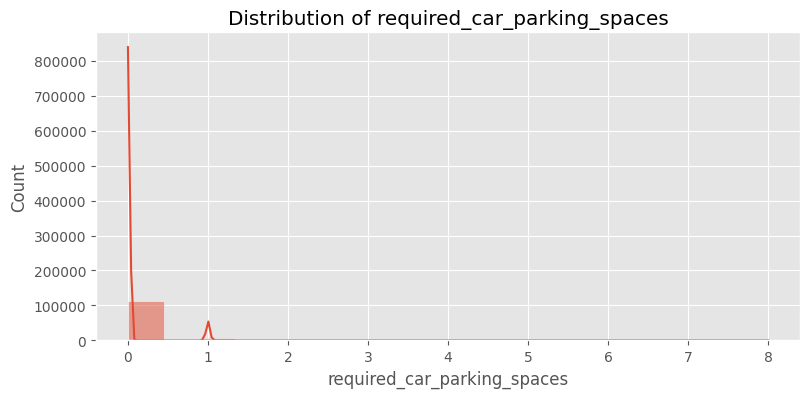

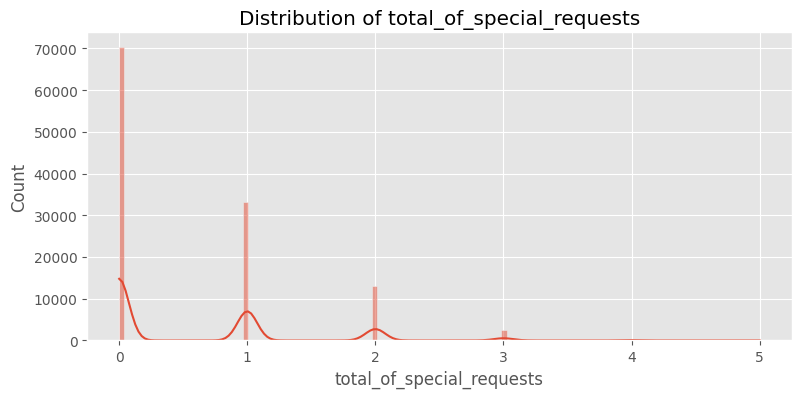

In [23]:
#plot histograms for numerical variables
plt.style.use('ggplot')
for column in conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde = True)
    plt.title(f'Distribution of {column}')
    plt.show()

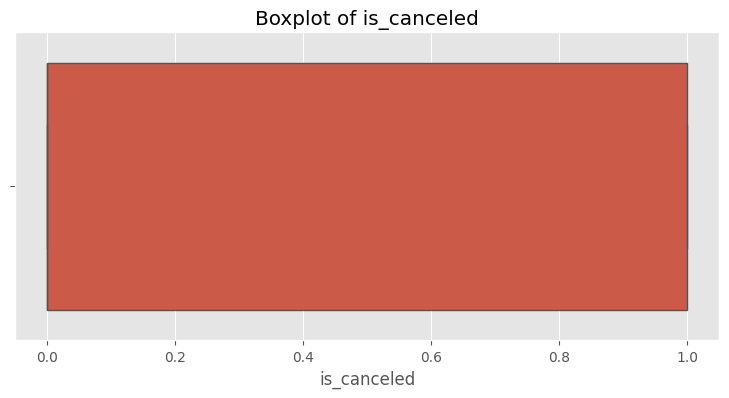

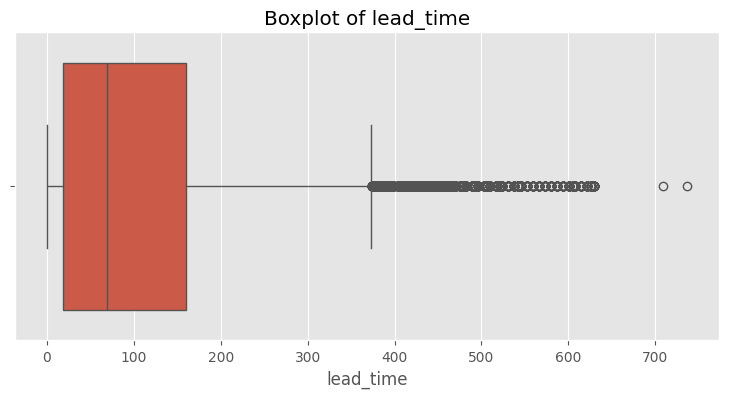

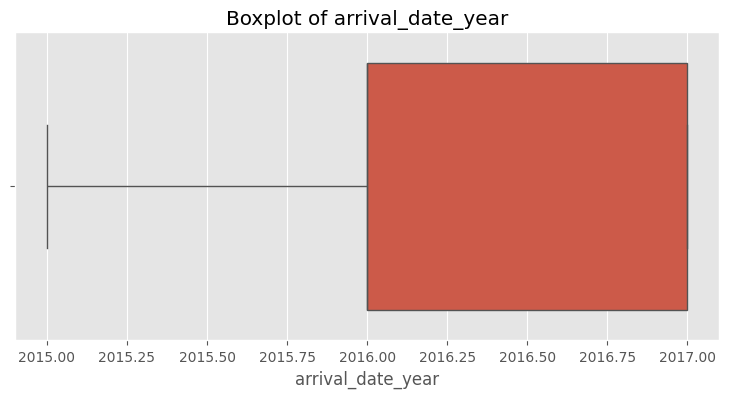

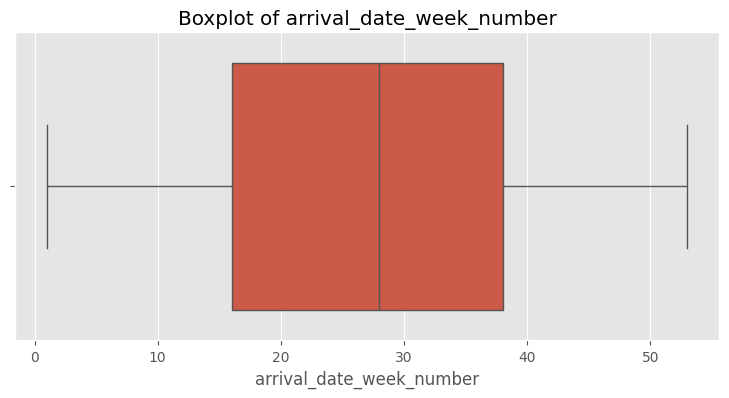

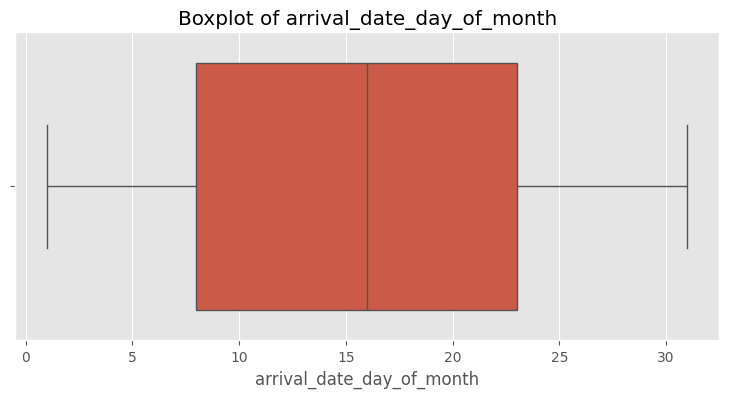

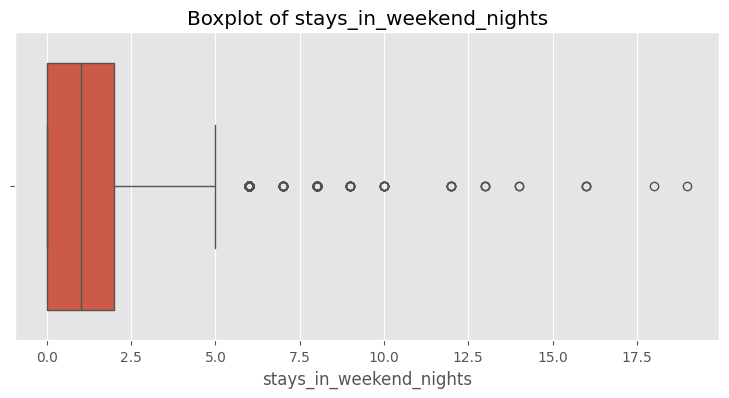

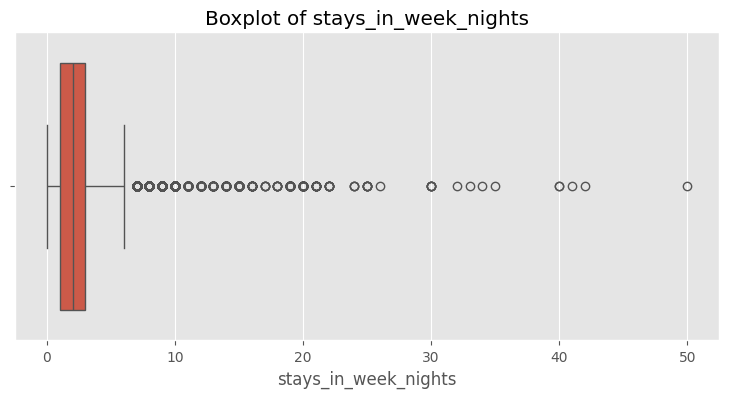

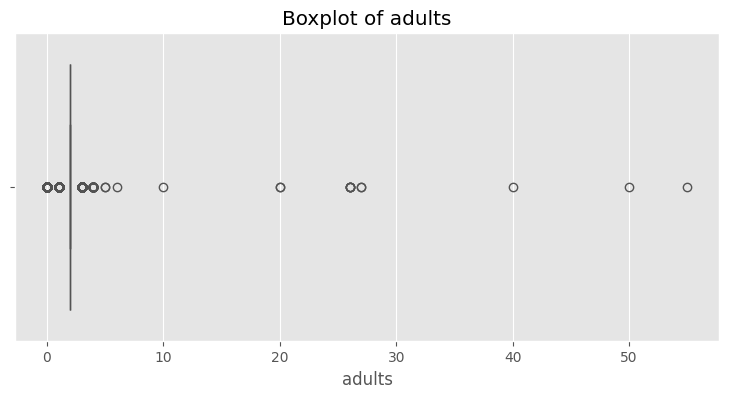

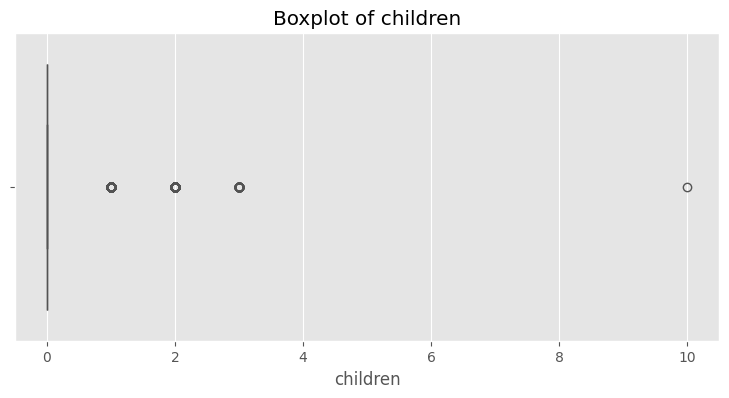

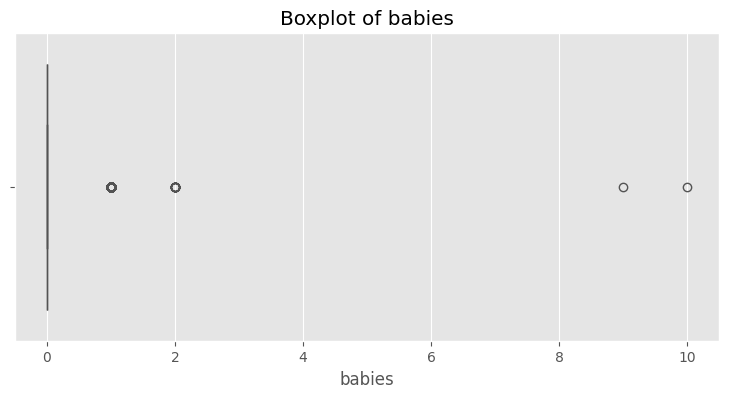

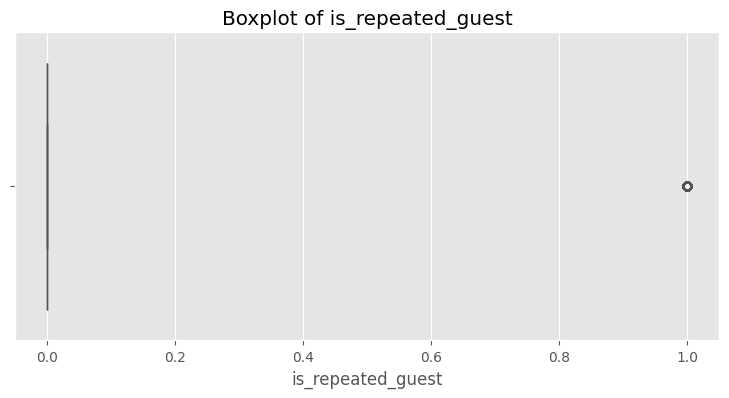

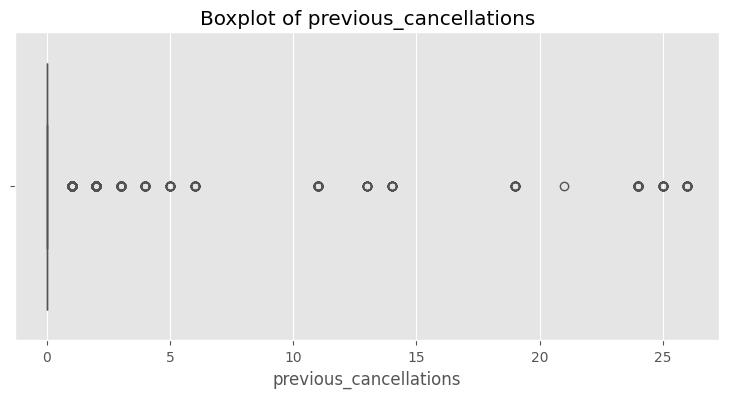

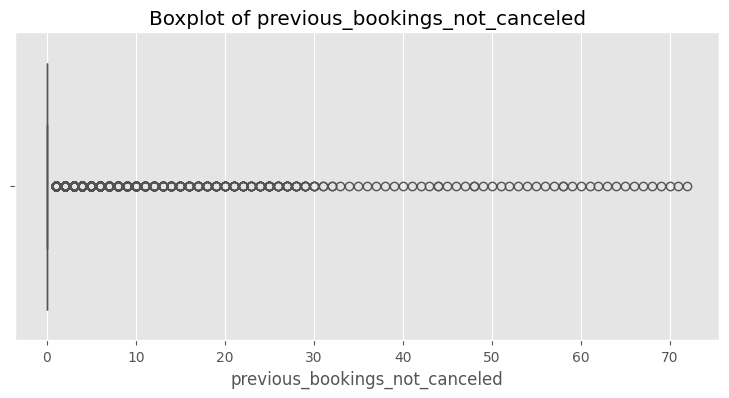

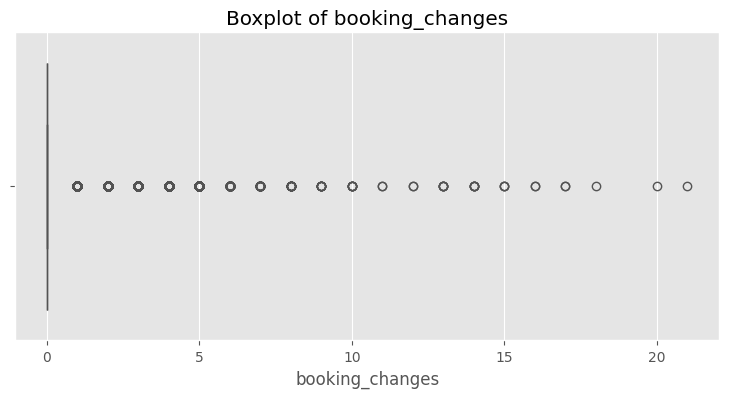

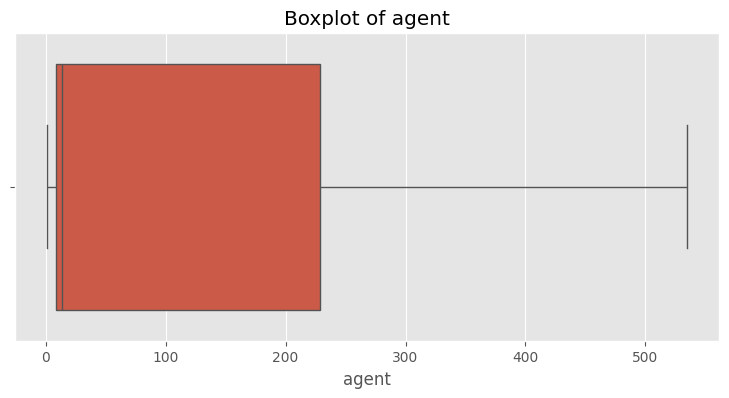

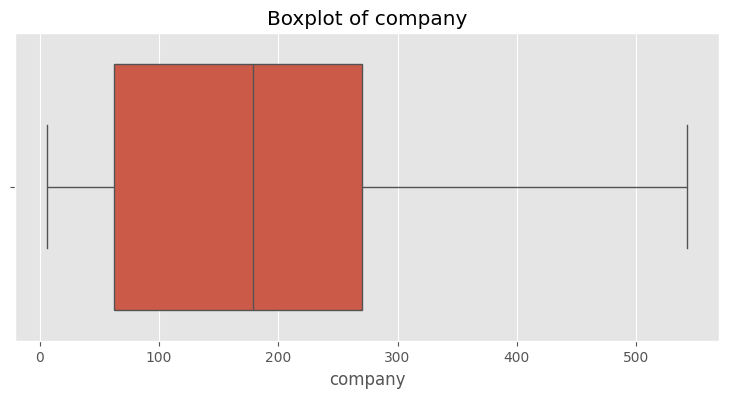

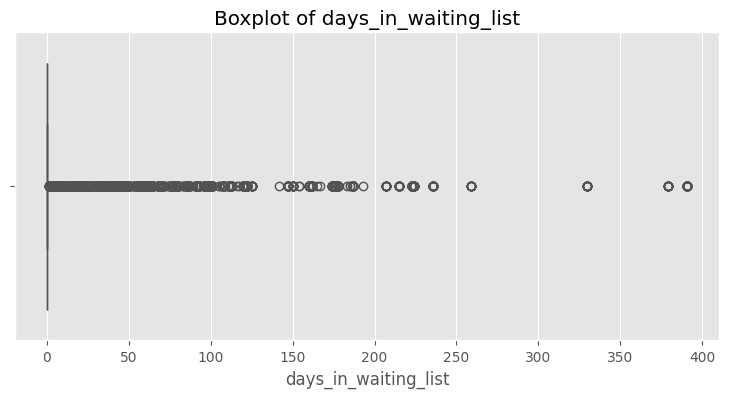

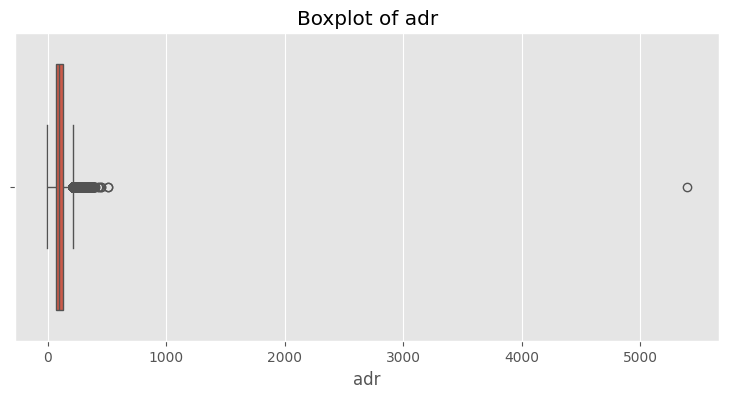

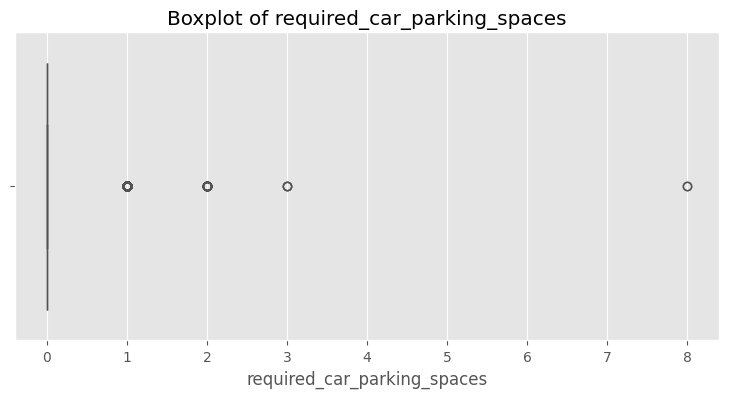

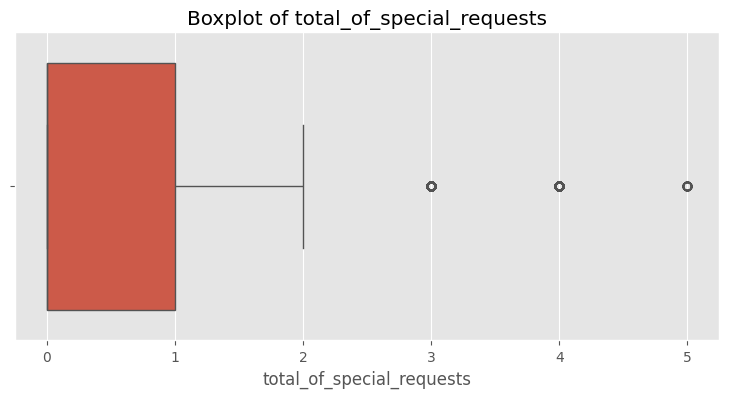

In [24]:
#plot boxplots of all continuous features
plt.style.use('ggplot')
for column in conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Correlations

In [25]:
#correlations
corr_matrix = df[conf].corr()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


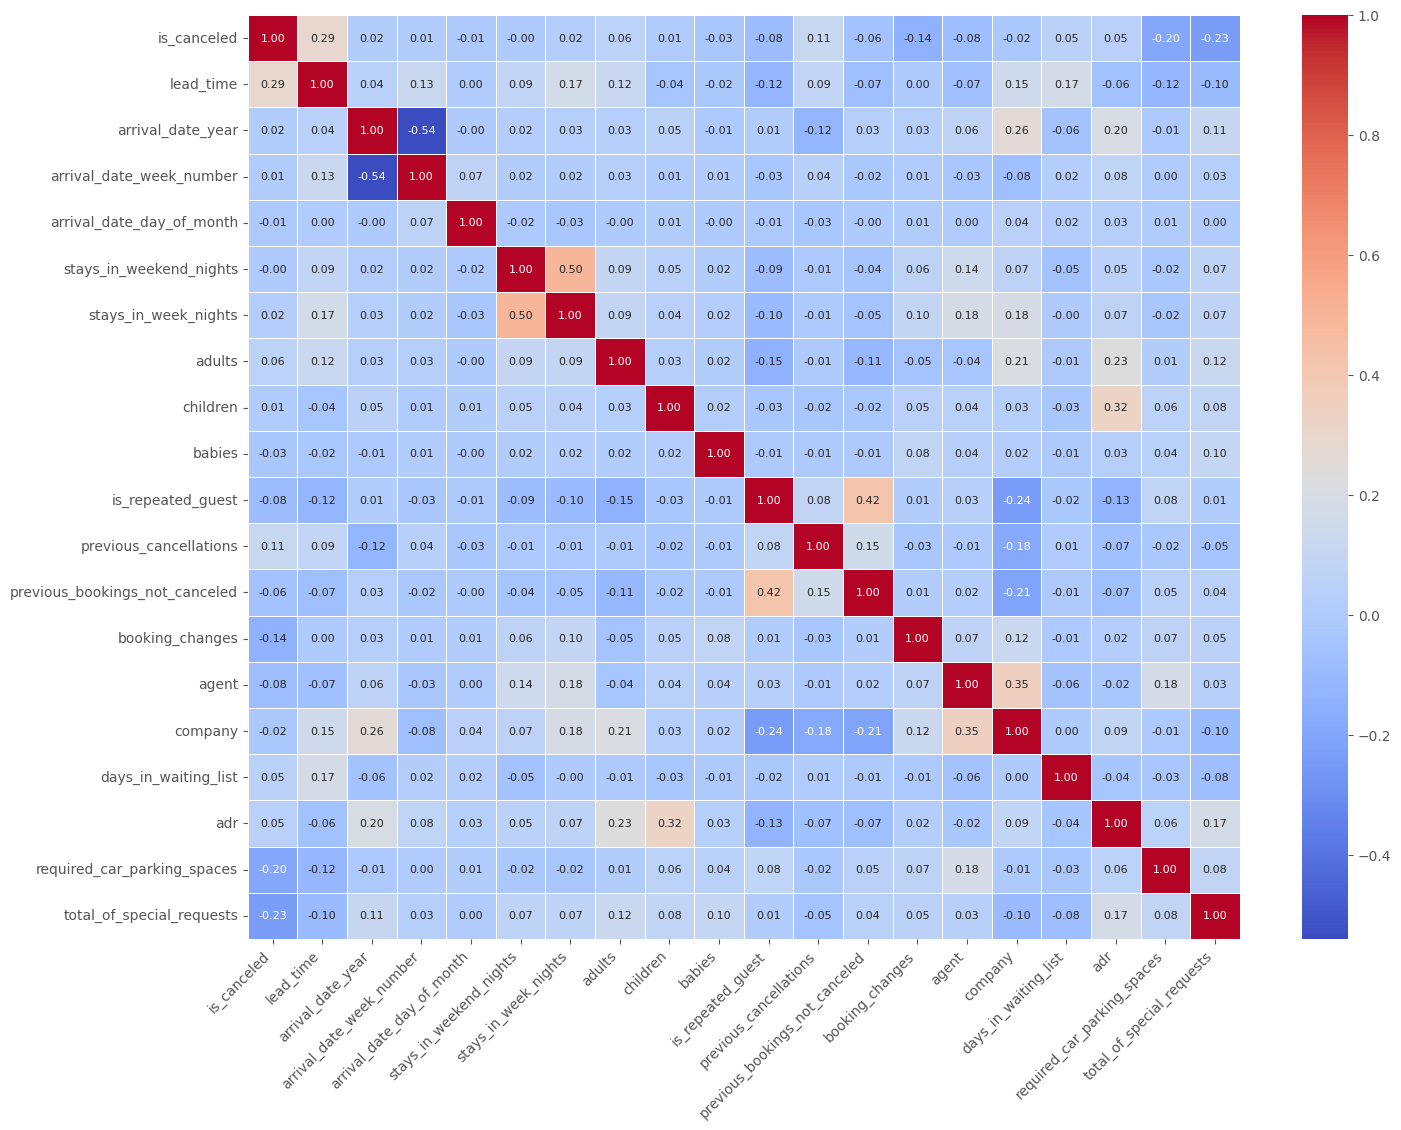

In [26]:
# Create a heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.show()

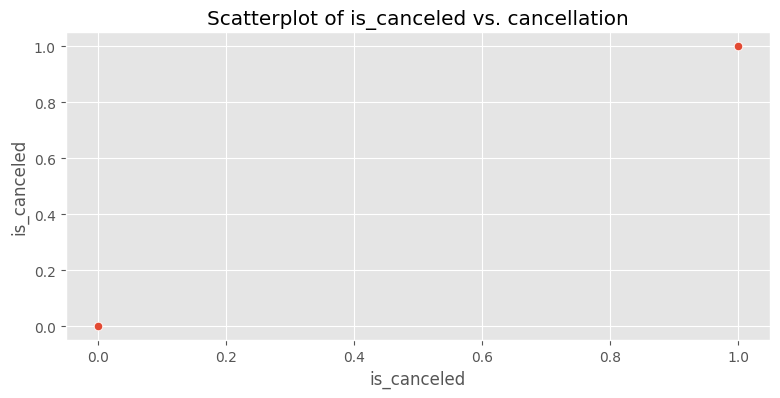

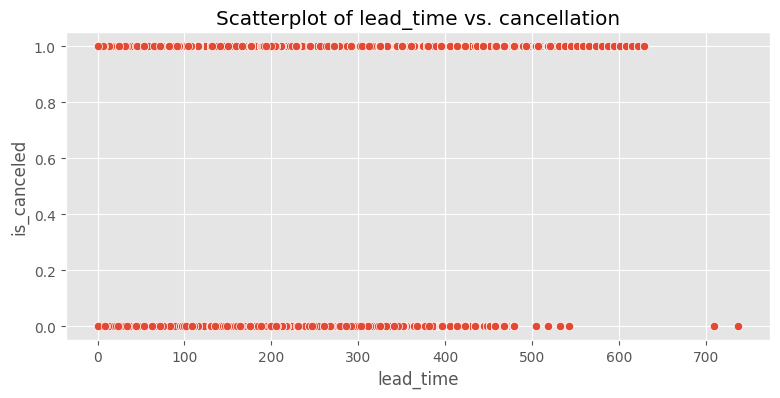

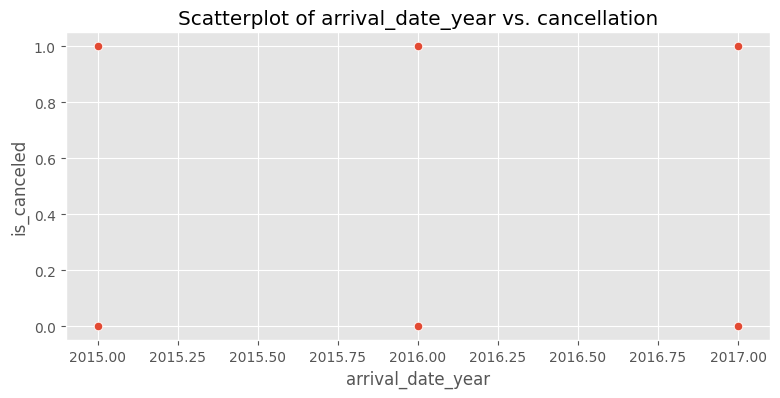

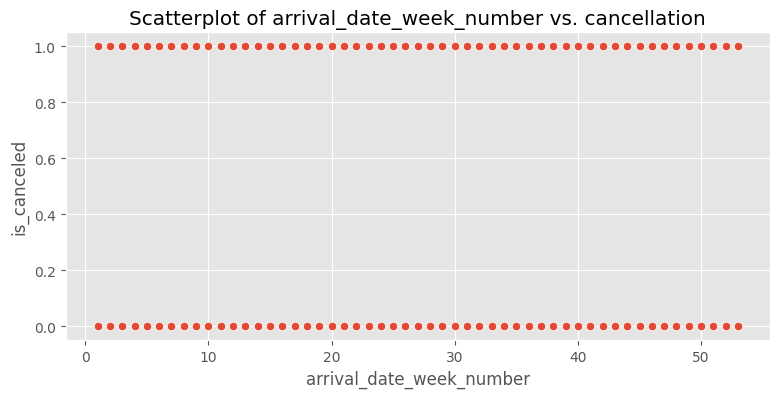

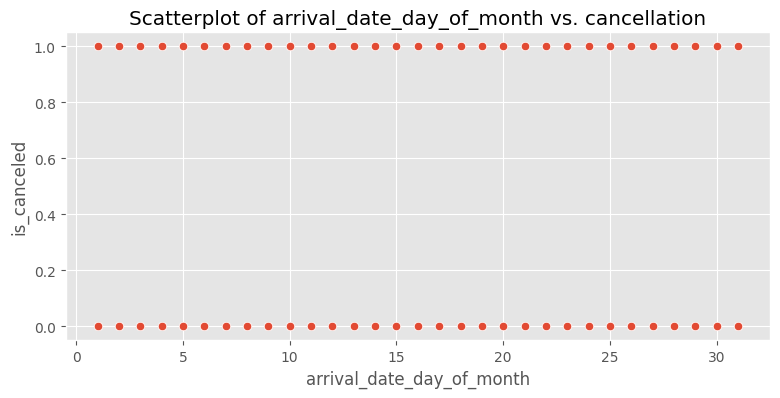

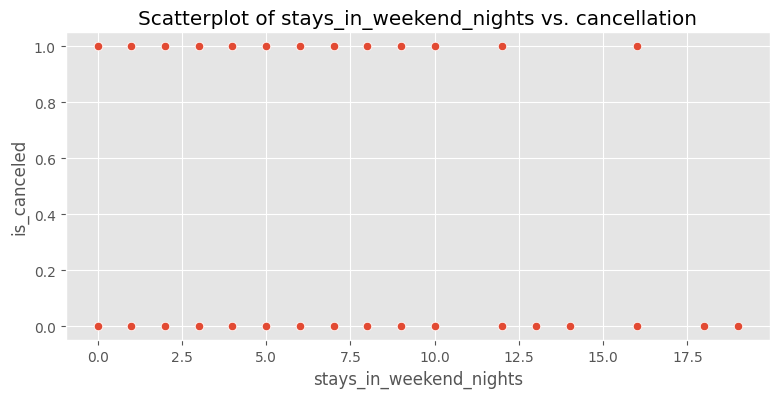

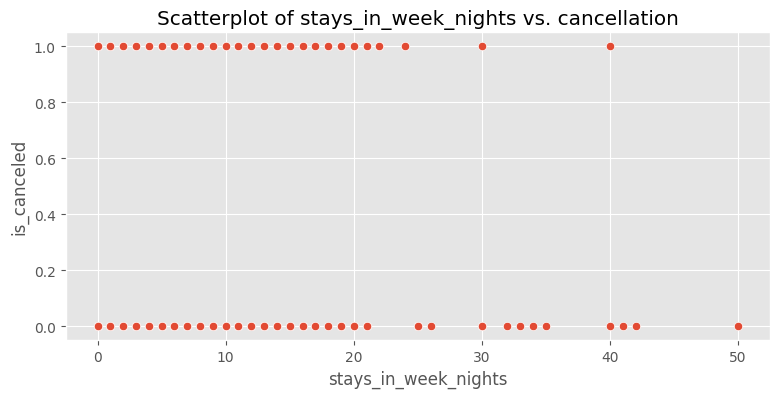

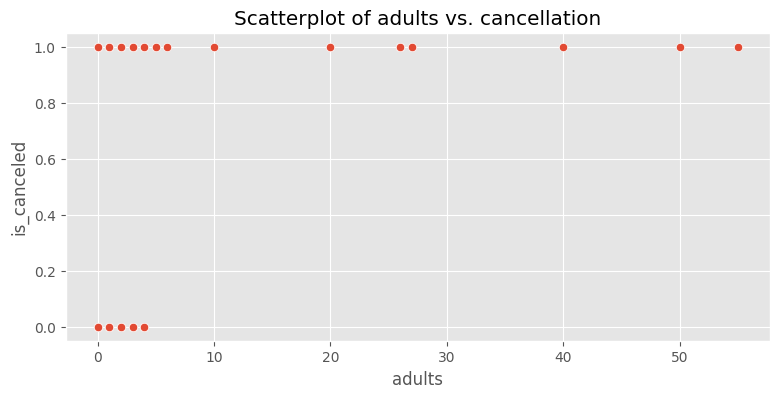

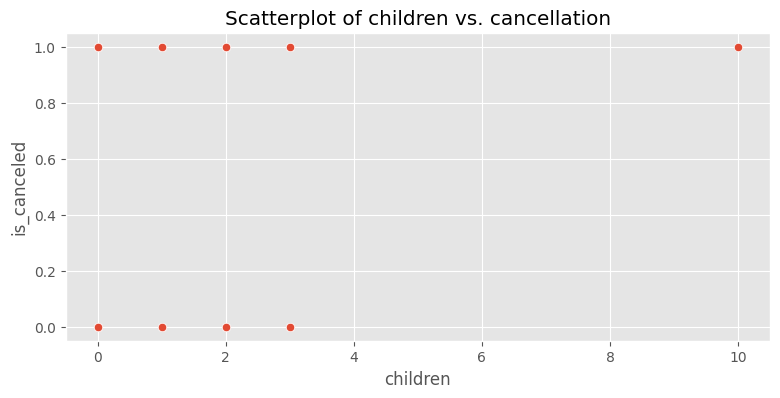

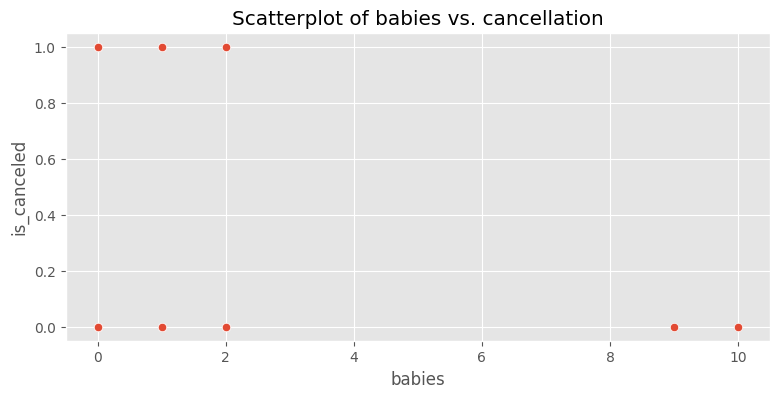

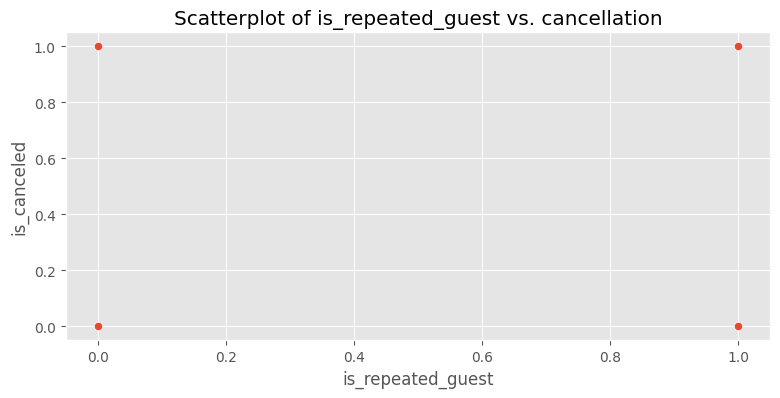

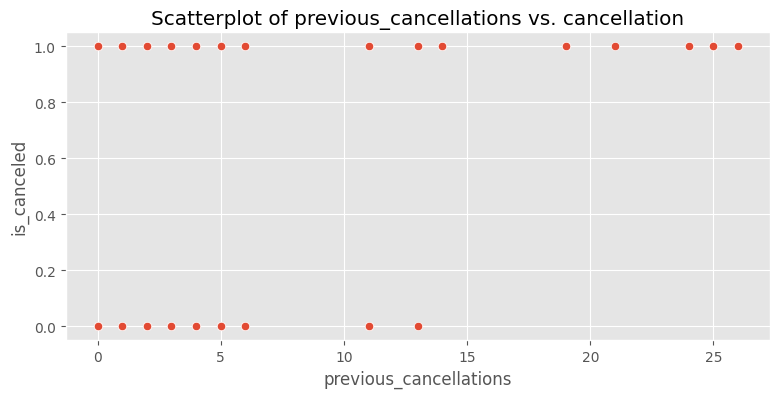

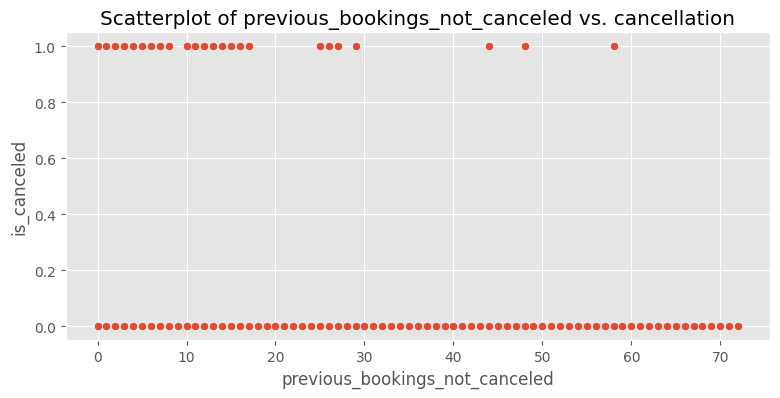

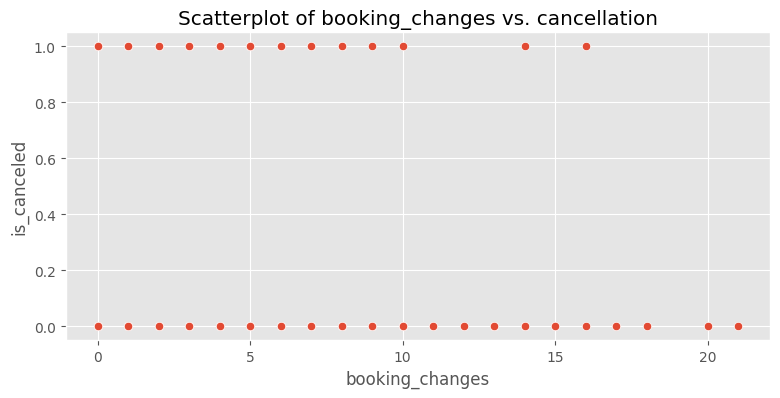

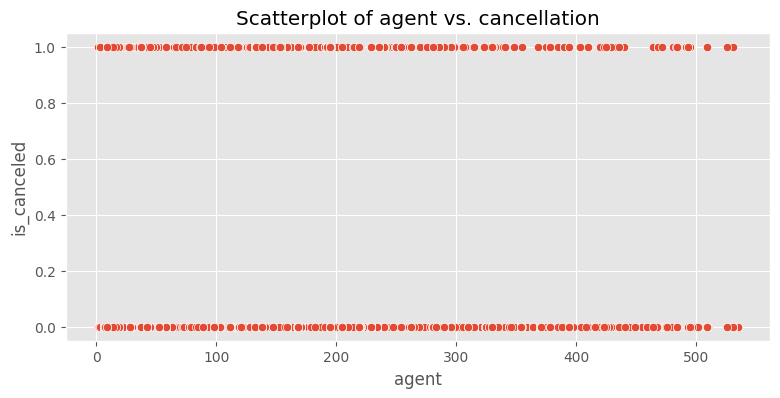

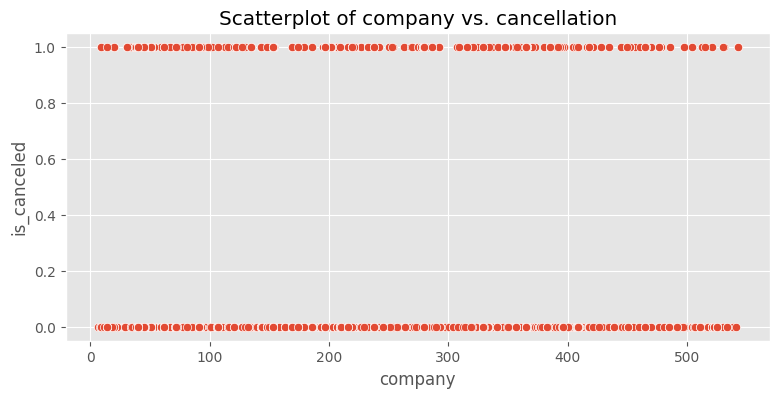

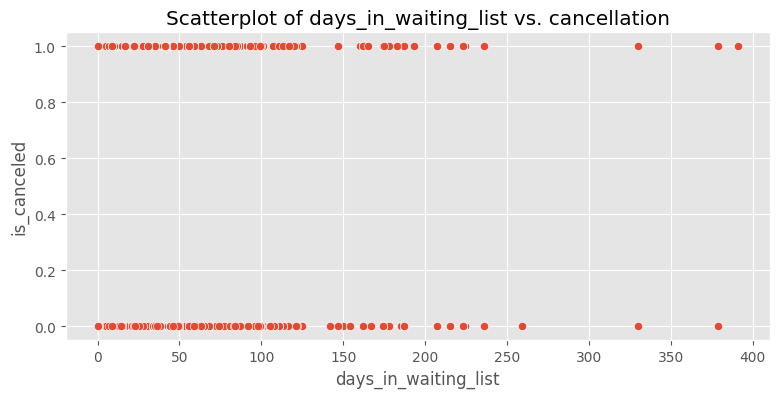

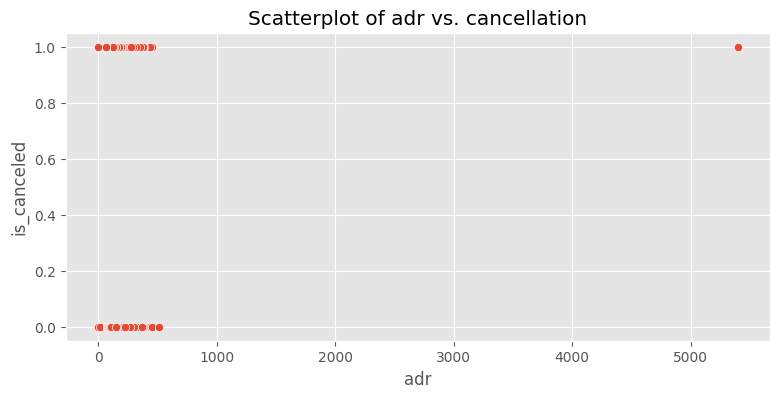

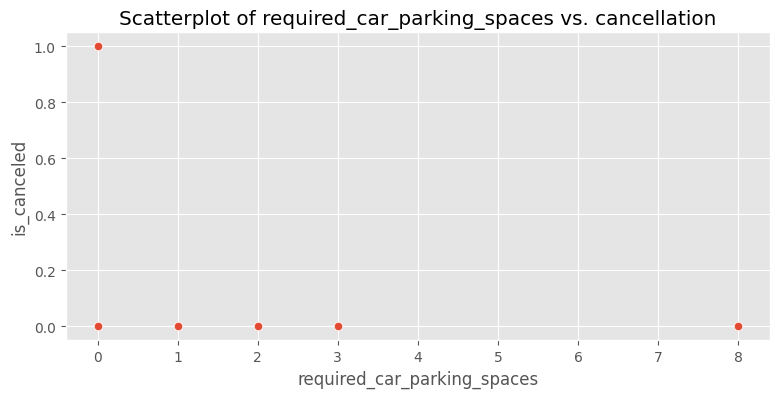

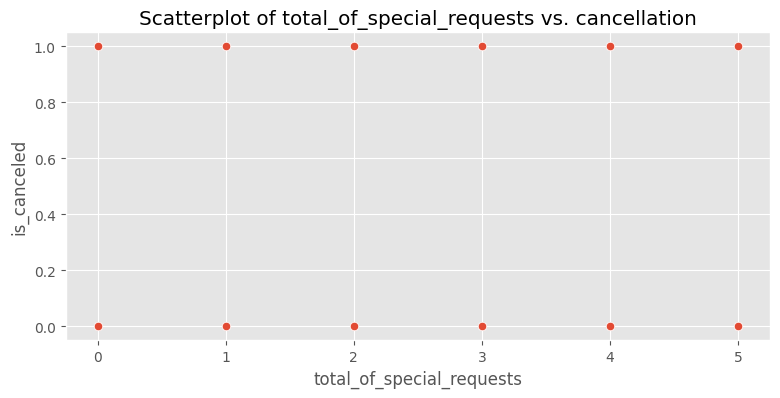

In [29]:
#plot scatterplots for continuous variables
plt.style.use('ggplot')
for column in conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[column], y=df['is_canceled'])
    plt.title(f'Scatterplot of {column} vs. cancellation')
    plt.show()